**Problem Statement :**

In this project, I will be performing a classification analysis to predict the likelihood of a patient suffering a stroke. This binary classification problem involves using multiple numerical and categorical features such as age, hypertension, work type, residence type, marital status, BMI, smoking status, gender, and heart disease. The objective is to develop a model that can accurately classify patients as either at risk or not at risk for a stroke. By understanding the key factors that contribute to stroke risk, healthcare providers can implement targeted prevention strategies and personalized care plans. This project is crucial for improving patient outcomes, enhancing preventive healthcare measures, and optimizing resource allocation in the medical field.

**Aim :**

To classify / predict whether a patient can suffer a stroke.
It is a binary classification problem with multiple numerical and categorical features.

# Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
import warnings
warnings.filterwarnings('ignore')
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer

In [ ]:
df=pd.read_csv("Heart Stroke.csv")

In [ ]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2915,34068,Female,23.0,0,0,Yes,Govt_job,Urban,77.53,33.9,formerly smoked,0
3891,53748,Male,77.0,0,0,Yes,Self-employed,Urban,57.60,32.2,Unknown,0
3804,37631,Male,50.0,0,0,Yes,Govt_job,Urban,89.18,34.8,smokes,0
3323,8410,Female,8.0,0,0,No,children,Rural,98.90,18.8,Unknown,0
3204,38348,Female,66.0,0,0,Yes,Private,Urban,80.10,32.0,never smoked,0


# Basic Information of the Dataset


1. id : unique identifier
2. gender : "Male", "Female" or "Other"
3. age : age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease : 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married : "No" or "Yes"
7. work_type : "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type : "Rural" or "Urban"
9. avg_glucose_level : average glucose level in blood
10. bmi : body mass index
11. smoking_status : "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke : 1 if the patient had a stroke or 0 if not

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.isnull().mean()*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

 We can see that bmi has missing values.


In [ ]:
df.duplicated().sum()

0

Filling null values with different methods

In [ ]:
data=df.copy()
data['bmi_mean']=df['bmi'].fillna(df['bmi'].mean())
data['bmi_median']=df['bmi'].fillna(df['bmi'].median())
data['bmi_interpolate']=df['bmi'].fillna(df['bmi'].interpolate())

Comparing original variance with variance of filled values. The ideal method will be which has little differnce to the original one.

In [ ]:
print("Before filling the null values",df['bmi'].var())
print("Filling with mean values",data['bmi_mean'].var())
print("Filling with median values",data['bmi_median'].var())
print("Filling with mode values",data['bmi_interpolate'].var())

Before filling the null values 61.68636419426886
Filling with mean values 59.25947846260943
Filling with median values 59.283259900892446
Filling with mode values 60.45544512316859


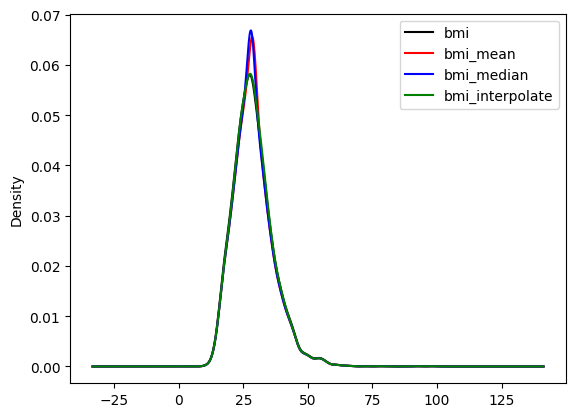

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['bmi'].plot(kind='kde',ax=ax,color='Black')
data['bmi_mean'].plot(kind='kde',ax=ax,color='Red')
data['bmi_median'].plot(kind='kde',ax=ax,color='Blue')
data['bmi_interpolate'].plot(kind='kde',ax=ax,color='Green')
ax.legend(['Mean','Median','Interpolate'])
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

We can see using interpolate method, we get negligible difference in the variance to the original variance. Also, the shape of the distribution remains same. Thus we will use this method for filling null values.

In [ ]:
df['bmi'].fillna(df['bmi'].interpolate(),inplace=True)

We will drop id column as it is not useful for predicting stroke results.

In [ ]:
df.drop(['id'],inplace=True,axis=1)

In [ ]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

Our dataset is highly imbalanced. So, we will perform EDA twice first before balancing the data and second after balancing the data to check if the data is ready for modelling and hidden patterns that may be peturbed due to imbalanced ddata.

# Data Visualisation
Univariate Analysis

Text(0.5, 1.0, 'smoking_status')

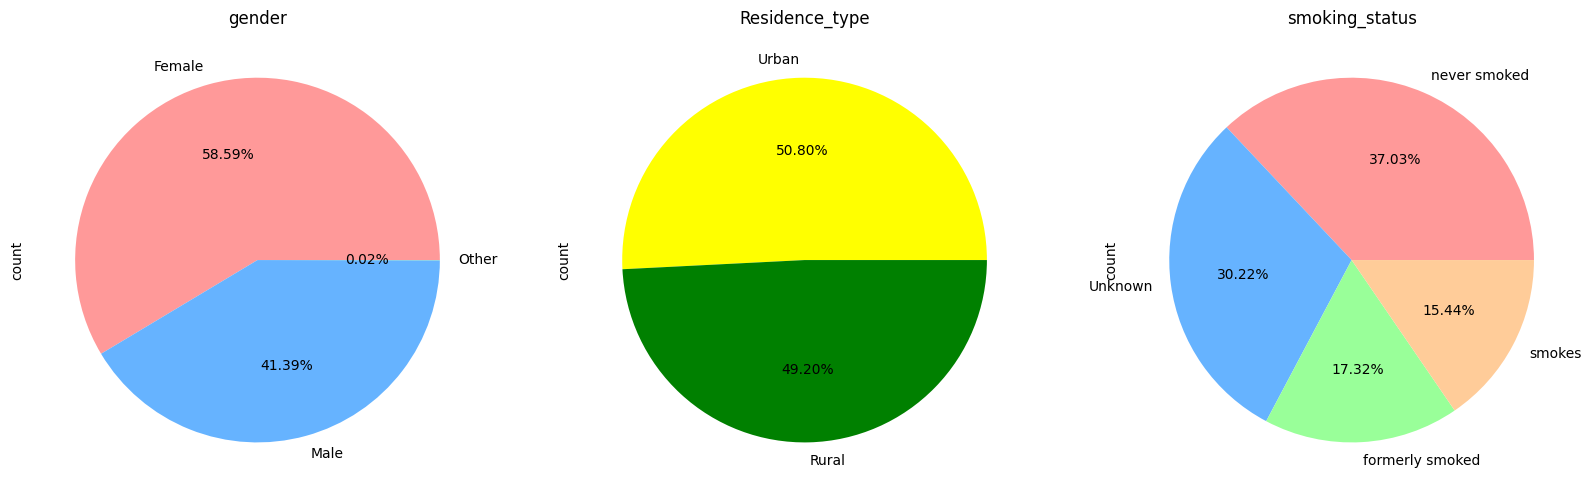

In [ ]:
plt.figure(figsize=(20,8))
color_palette1 = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
color_palette2 = ['yellow','green','#ff6666','#c2f0c2']
plt.subplot(131)
df['gender'].value_counts().plot(kind='pie',autopct='%1.2f%%',colors=color_palette1)
plt.title('gender')
plt.subplot(132)
df['Residence_type'].value_counts().plot(kind='pie',autopct='%1.2f%%',colors=color_palette2)
plt.title('Residence_type')
plt.subplot(133)
df['smoking_status'].value_counts().plot(kind='pie',autopct='%1.2f%%',colors=color_palette1)
plt.title('smoking_status')

1. We can see that in our dataset, females are more than males with a very small proportion of others.
2. But there is a balance between people living in rural and urban areas.
3. There is large proportion of people who have never smoked while there is only 15.44% of the people who has smoked.

Text(0.5, 1.0, 'Distribution of work_type')

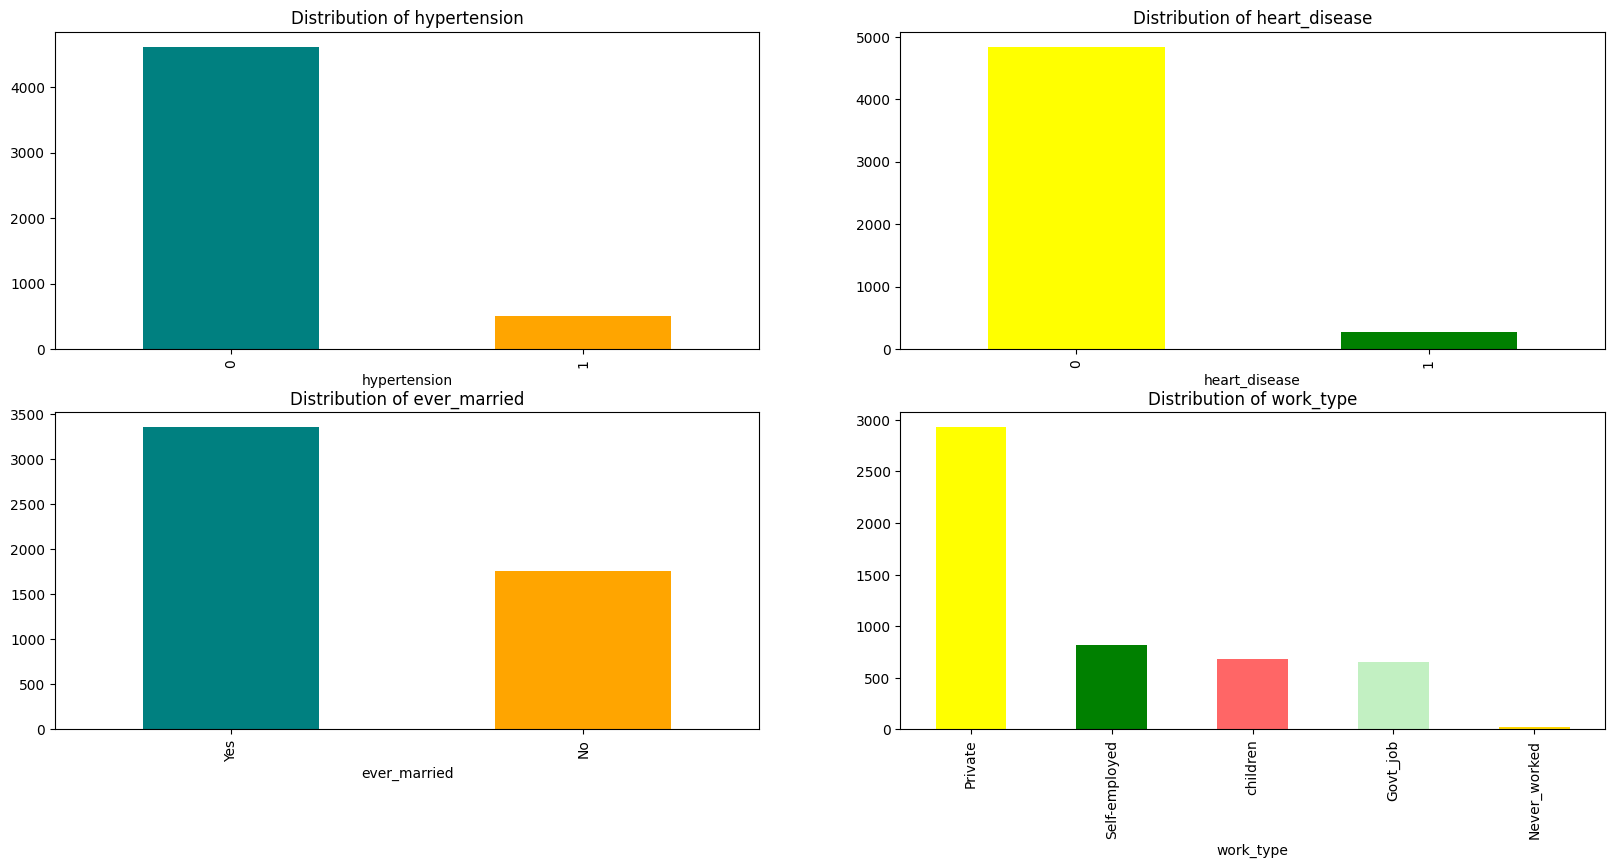

In [ ]:
plt.figure(figsize=(20,14))
color_palette1 = ['teal','orange','blue','red']
color_palette2 = ['yellow','green','#ff6666','#c2f0c2','gold']
plt.subplot(321)
df['hypertension'].value_counts().plot(kind='bar',color=color_palette1)
plt.title('Distribution of hypertension')
plt.subplot(322)
df['heart_disease'].value_counts().plot(kind='bar',color=color_palette2)
plt.title('Distribution of heart_disease')
plt.subplot(323)
df['ever_married'].value_counts().plot(kind='bar',color=color_palette1)
plt.title('Distribution of ever_married')
plt.subplot(324)
df['work_type'].value_counts().plot(kind='bar',color=color_palette2)
plt.title('Distribution of work_type')

The above bar graphs represents that:
1. There is less number of people who have hypertension in comparison of very high number of people who do not have problems like hypertension.
2. Majority of the people in our dataset is married once in their life.
3. There is less number of people who have heart disease in comparison of very disease free people.
4. We have significantly high number of people who work in private job in comparison of self-employed, children and govt. jobs with neglibile difference while there are very few people who have never worked in their life.

Bivariate and Multivariate Analysis

Text(0.5, 1.0, 'ever_married vs stroke')

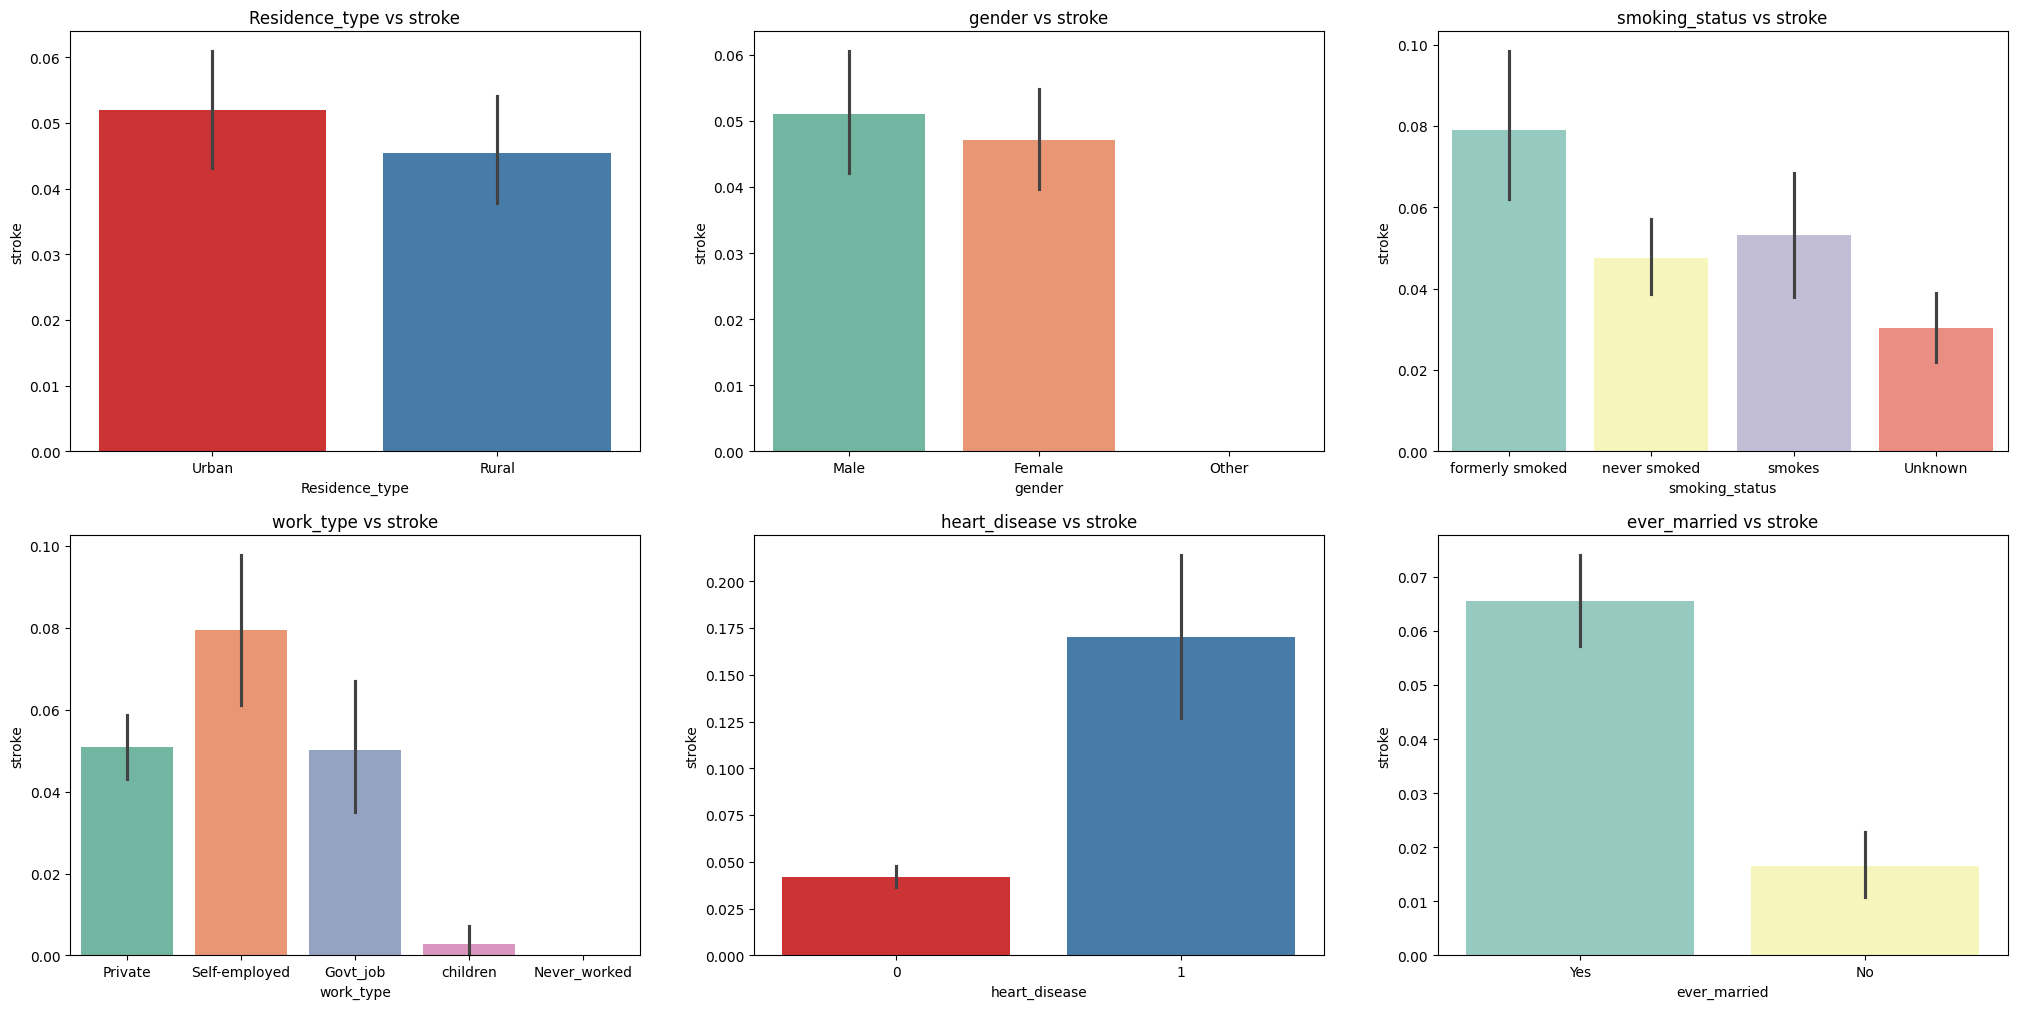

In [ ]:
plt.figure(figsize=(25,12))
plt.subplot(231)
sns.barplot(x=df['Residence_type'],y=df['stroke'],palette=sns.color_palette("Set1"))
plt.title('Residence_type vs stroke')
plt.subplot(232)
sns.barplot(x=df['gender'],y=df['stroke'],palette=sns.color_palette("Set2"))
plt.title('gender vs stroke')
plt.subplot(233)
sns.barplot(x=df['smoking_status'],y=df['stroke'],palette=sns.color_palette("Set3"))
plt.title('smoking_status vs stroke')
plt.subplot(234)
sns.barplot(x=df['work_type'],y=df['stroke'],palette=sns.color_palette("Set2"))
plt.title('work_type vs stroke')
plt.subplot(235)
sns.barplot(x=df['heart_disease'],y=df['stroke'],palette=sns.color_palette("Set1"))
plt.title('heart_disease vs stroke')
plt.subplot(236)
sns.barplot(x=df['ever_married'],y=df['stroke'],palette=sns.color_palette("Set3"))
plt.title('ever_married vs stroke')


From the above plots shown between heart stroke vs different attributes tells us that:
1. Urban people have high chance of getting high stroke in comparison of rural people.
2. Males are more prone to heart stroke in comparison of females.
3. Those who formerly smoke have more chance to be a victim of heart stroke in comparison to those who smoke regularly.
4. At the same time, those who have never worked, they have negligible chance of getting heart stroke. Private or Government employee have same chance of getting stroke but less than self employed people.
5. Those who have heart disease, they have much higher chance to get heart stroke while no heart disease people are also not completely at safer side.
6. Married people have higher chance of getting higher stroke.

Text(0.5, 1.0, 'smoking_status vs bmi')

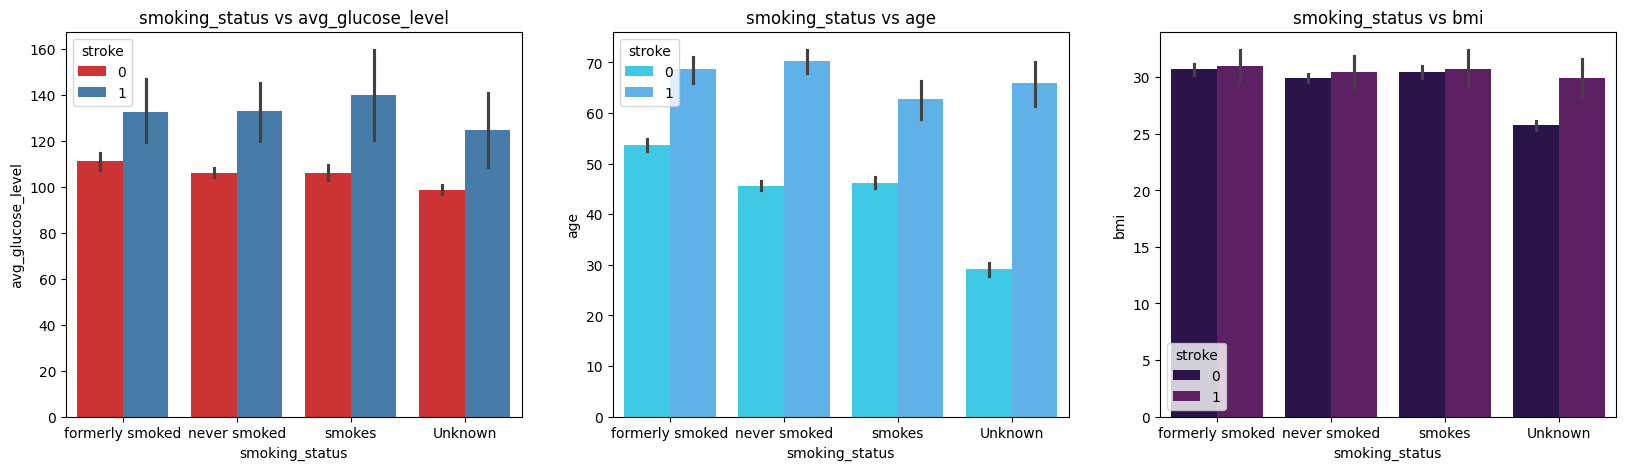

In [ ]:
plt.figure(figsize=(20,5))
color_palette2 = ['yellow','green','#ff6666','#c2f0c2','gold']
plt.subplot(131)
sns.barplot(x=df['smoking_status'],y=df['avg_glucose_level'],hue=df['stroke'],palette=sns.color_palette("Set1"))
plt.title('smoking_status vs avg_glucose_level')
plt.subplot(132)
sns.barplot(x=df['smoking_status'],y=df['age'],hue=df['stroke'],palette=sns.color_palette("cool"))
plt.title('smoking_status vs age')
plt.subplot(133)
sns.barplot(x=df['smoking_status'],y=df['bmi'],hue=df['stroke'],palette=sns.color_palette("inferno"))
plt.title('smoking_status vs bmi')

1. Those who haven't suffered from heart stroke have average glucose level in the range between 100-120 irrespective of their smoking status. While those who smoke and suffered from heart stroke has higher glucose level.
2. People who smoke live less life in comparison to non-smokers. Heart Stroke occurs in the age of 60-70 years irrespective of their smoking status.
3. BMI makes no difference across the status of the smoking. Although those who have no stroke have always lower bmi across all smoking status.

Text(0.5, 1.0, 'Residence_type vs bmi')

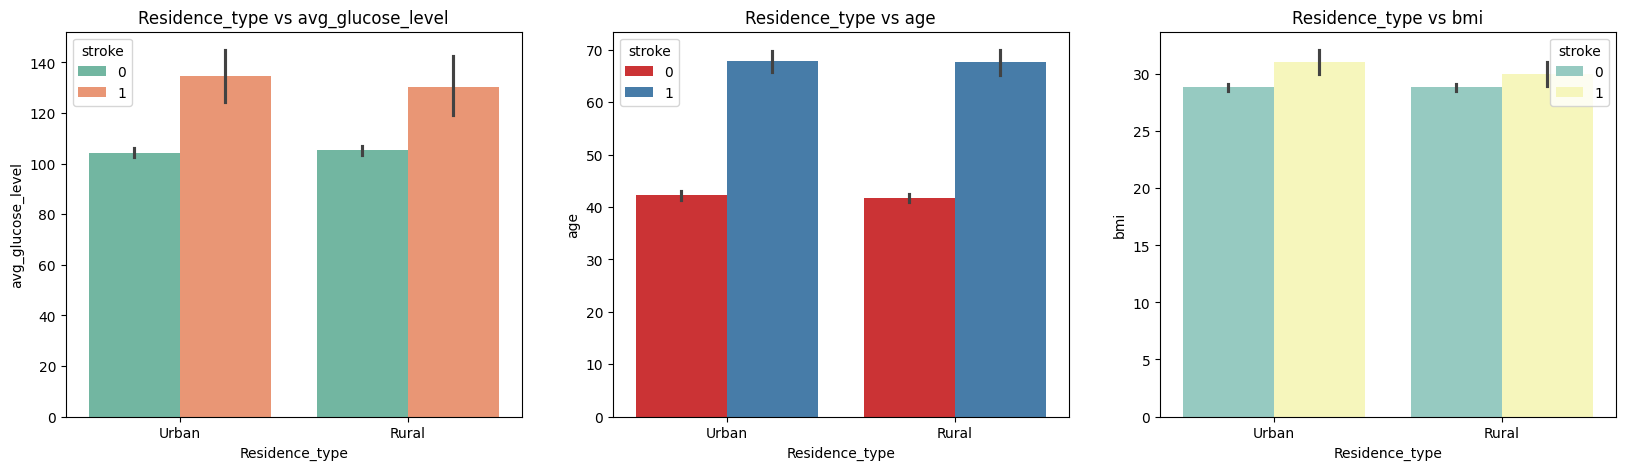

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.barplot(x=df['Residence_type'],y=df['avg_glucose_level'],hue=df['stroke'],palette=sns.color_palette("Set2"))
plt.title('Residence_type vs avg_glucose_level')
plt.subplot(132)
sns.barplot(x=df['Residence_type'],y=df['age'],hue=df['stroke'],palette=sns.color_palette("Set1"))
plt.title('Residence_type vs age')
plt.subplot(133)
sns.barplot(x=df['Residence_type'],y=df['bmi'],hue=df['stroke'],palette=sns.color_palette("Set3"))
plt.title('Residence_type vs bmi')

1. Urban and Rural people who are victim of heart strokes have glucose level between 120-140. Those who do not have heart stroke have glucose level near about 100 units.
2. Age of the heart stroke in both rural and urban places is 60-70 years.
3. Heart stroke victims have higher bmi and it is huge in units in urban people with slight difference.

Text(0.5, 1.0, 'work_type vs bmi')

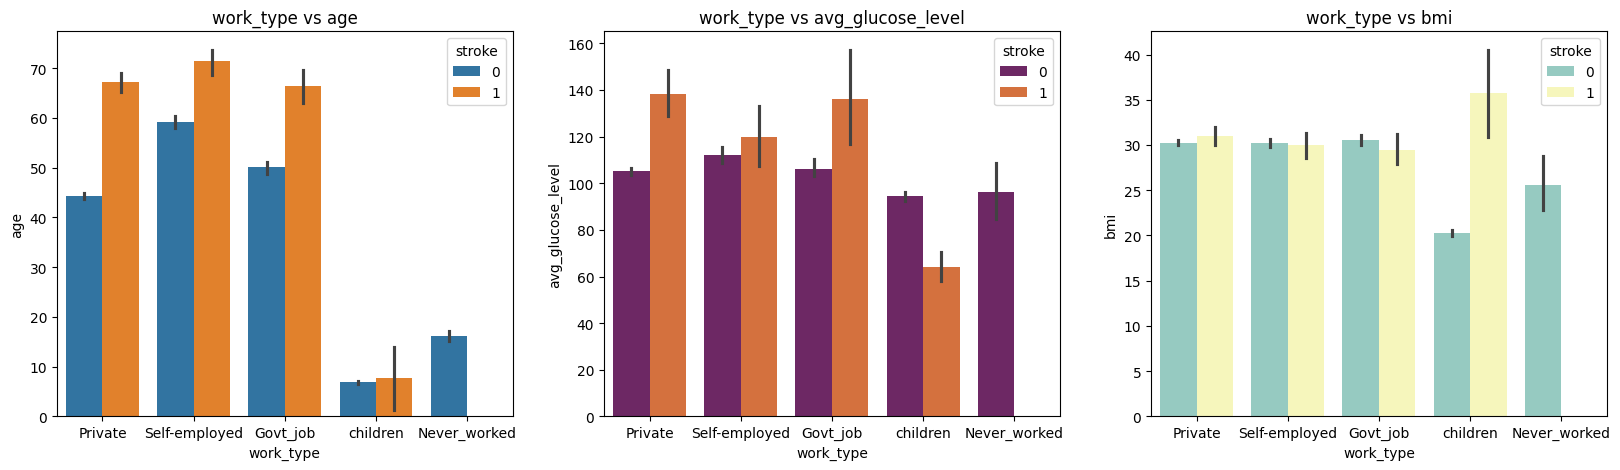

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.barplot(x=df['work_type'],y=df['age'],hue=df['stroke'])
plt.title('work_type vs age')
plt.subplot(132)
sns.barplot(x=df['work_type'],y=df['avg_glucose_level'],hue=df['stroke'],palette="inferno")
plt.title('work_type vs avg_glucose_level')
plt.subplot(133)
sns.barplot(x=df['work_type'],y=df['bmi'],hue=df['stroke'],palette="Set3")
plt.title('work_type vs bmi')

1. People employed in Private, Government or Self-employed jobs suffer from heart stroke at the age of 60-70 years old. While children suffer from heart stroke between the age of 0-10 years old.
2. Those children who suffer from heart stroke has low glucose level in comparison to healthy children. While in adults, private, self-employed and government employees have higher glucose level who have suffered heart stroke.
3. Similarly unlike the adults, higher bmi index children suffered from heart stroke while there is no significant difference in bmi for heart stroke and not-heart stroke patients.

Text(0.5, 1.0, 'bmi vs heart_disease')

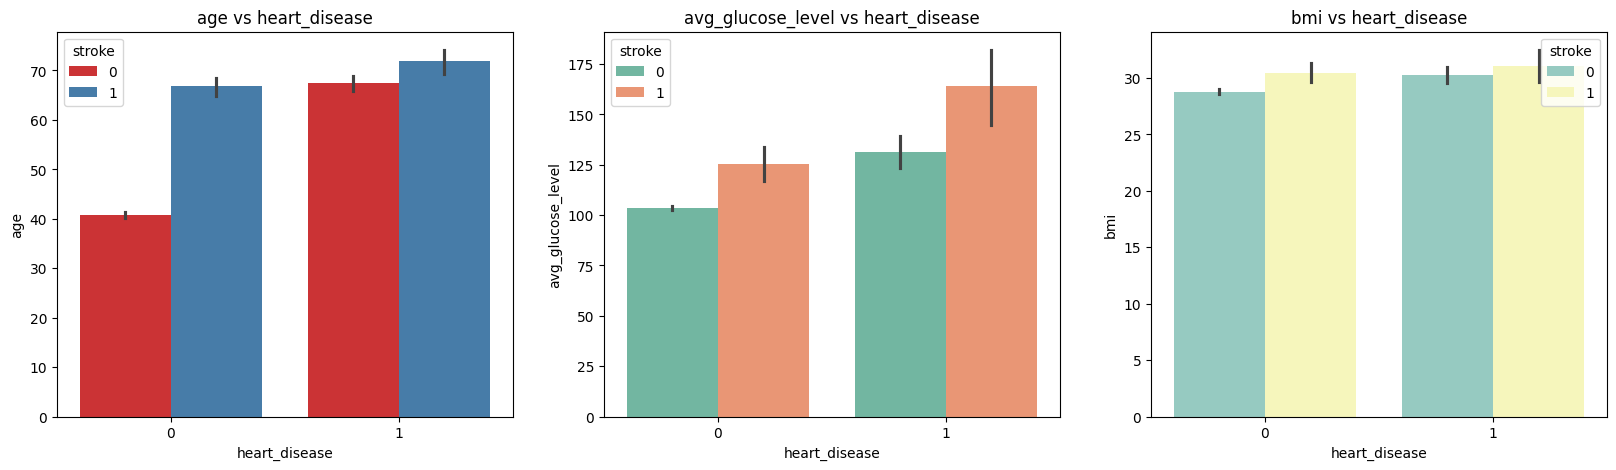

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'heart_disease',y = 'age',data = df,hue = 'stroke',palette=sns.color_palette("Set1"))
title = 'age vs heart_disease'
plt.title(title)
plt.subplot(1,3,2)
ax = sns.barplot(x = 'heart_disease',y = 'avg_glucose_level',data = df,hue = 'stroke',palette=sns.color_palette("Set2"))
title = 'avg_glucose_level vs heart_disease'
plt.title(title)
plt.subplot(1,3,3)
ax = sns.barplot(x = 'heart_disease',y = 'bmi',data = df,hue = 'stroke',palette=sns.color_palette("Set3"))
title = 'bmi vs heart_disease'
plt.title(title)

1. Heart Disease patients will get the stroke at the age above than 70 while no heart disease patients will struck the heart stroke between 60-70 years.
2. Patients who suffer from heart stroke has higher glucose level. Heart Disease patients who suffer from heart stroke has higher glucose level in comparison of no heart disease patient.
3. Heart Disease patients suffered from stroke have higher bmi in comparison to those who suffered from stroke but free from heart disease.

Text(0.5, 1.0, 'ever_married vs bmi')

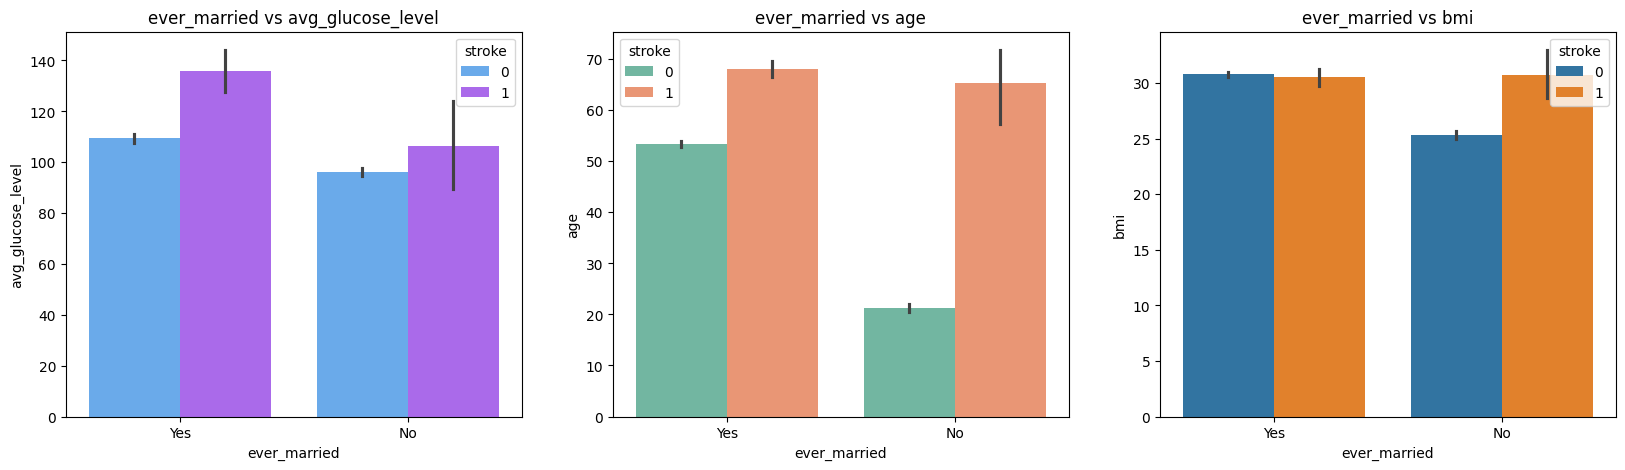

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.barplot(x=df['ever_married'],y=df['avg_glucose_level'],hue=df['stroke'],palette='cool')
plt.title('ever_married vs avg_glucose_level')
plt.subplot(132)
sns.barplot(x=df['ever_married'],y=df['age'],hue=df['stroke'],palette='Set2')
plt.title('ever_married vs age')
plt.subplot(133)
sns.barplot(x=df['ever_married'],y=df['bmi'],hue=df['stroke'])
plt.title('ever_married vs bmi')

1. Married people have high glucose level who have suffered from heart stroke.
2. Heart stroke will occur at the age of 60-70 years whether they are married or not.
3. Married people have high bmi who has not suffered from heart stroke. Also, unmarried people sufferd from heart stroke has high bmi index.

Text(0.5, 1.0, 'hypertension vs age')

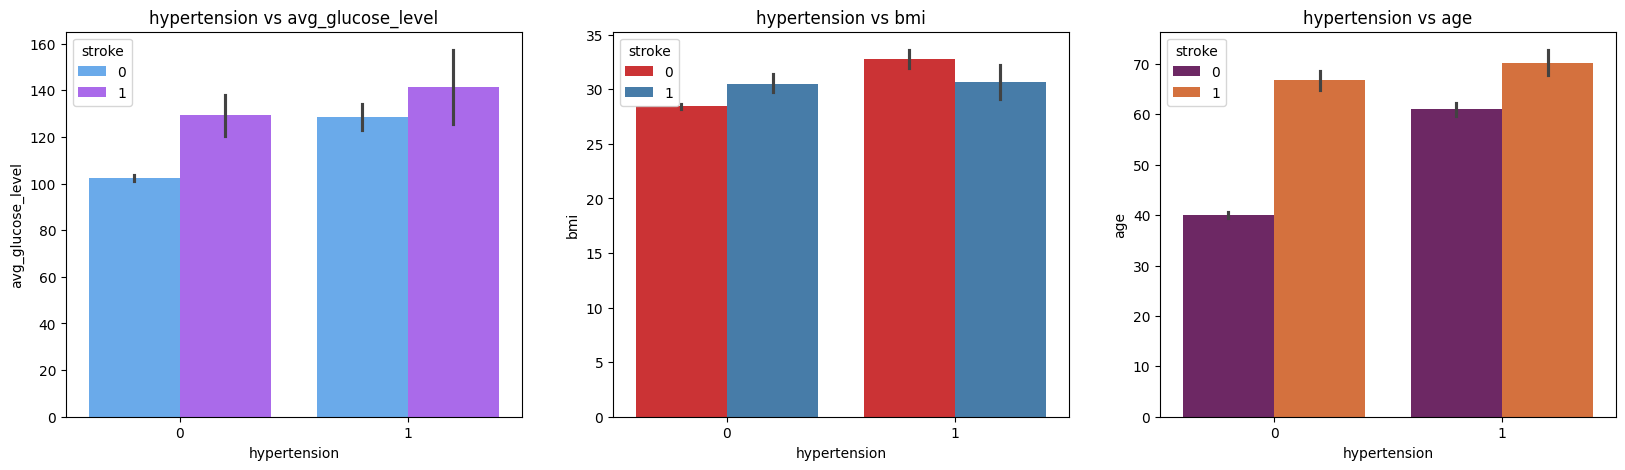

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.barplot(x=df['hypertension'],y=df['avg_glucose_level'],hue=df['stroke'],palette='cool')
plt.title('hypertension vs avg_glucose_level')
plt.subplot(132)
sns.barplot(x=df['hypertension'],y=df['bmi'],hue=df['stroke'],palette='Set1')
plt.title('hypertension vs bmi')
plt.subplot(133)
sns.barplot(x=df['hypertension'],y=df['age'],hue=df['stroke'],palette='inferno')
plt.title('hypertension vs age')

Text(0.5, 1.0, 'gender vs age')

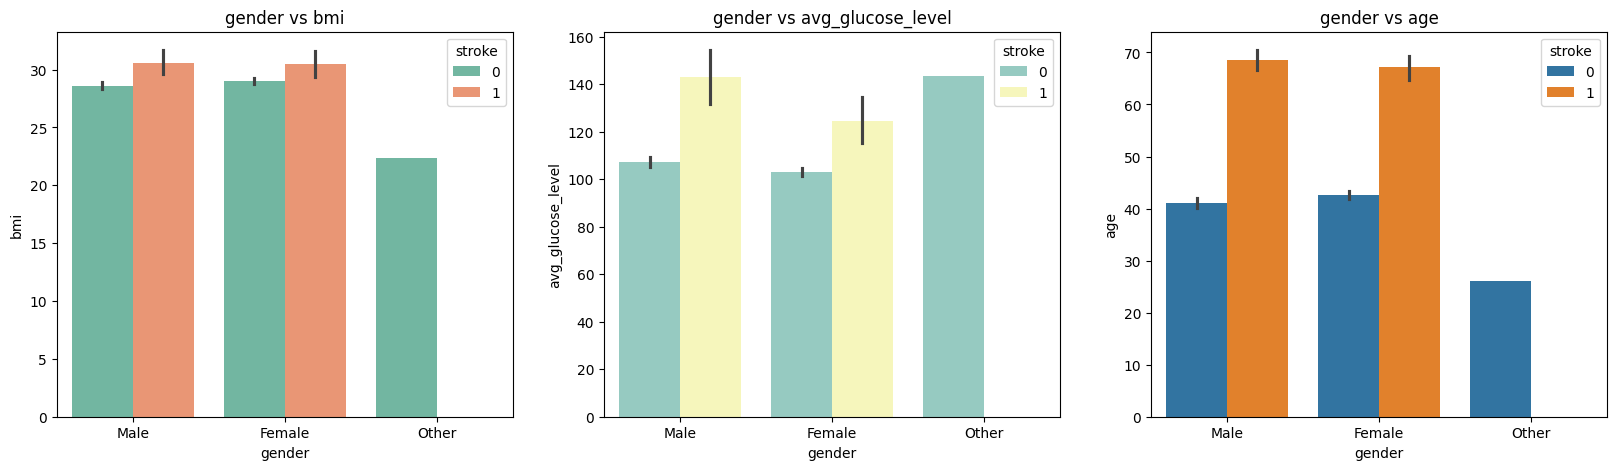

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.barplot(x=df['gender'],y=df['bmi'],hue=df['stroke'],palette='Set2')
plt.title('gender vs bmi')
plt.subplot(132)
sns.barplot(x=df['gender'],y=df['avg_glucose_level'],hue=df['stroke'],palette='Set3')
plt.title('gender vs avg_glucose_level')
plt.subplot(133)
sns.barplot(x=df['gender'],y=df['age'],hue=df['stroke'])
plt.title('gender vs age')

1. BMI remains same having suffered from stroke for both male and female while there is no stroke suffered people in the category of other.
2. Males suffered from stroke have high avg glucose level in comparison of female stroke patients.
3. Males and Females both have suffered the stroke at the age near about 70.

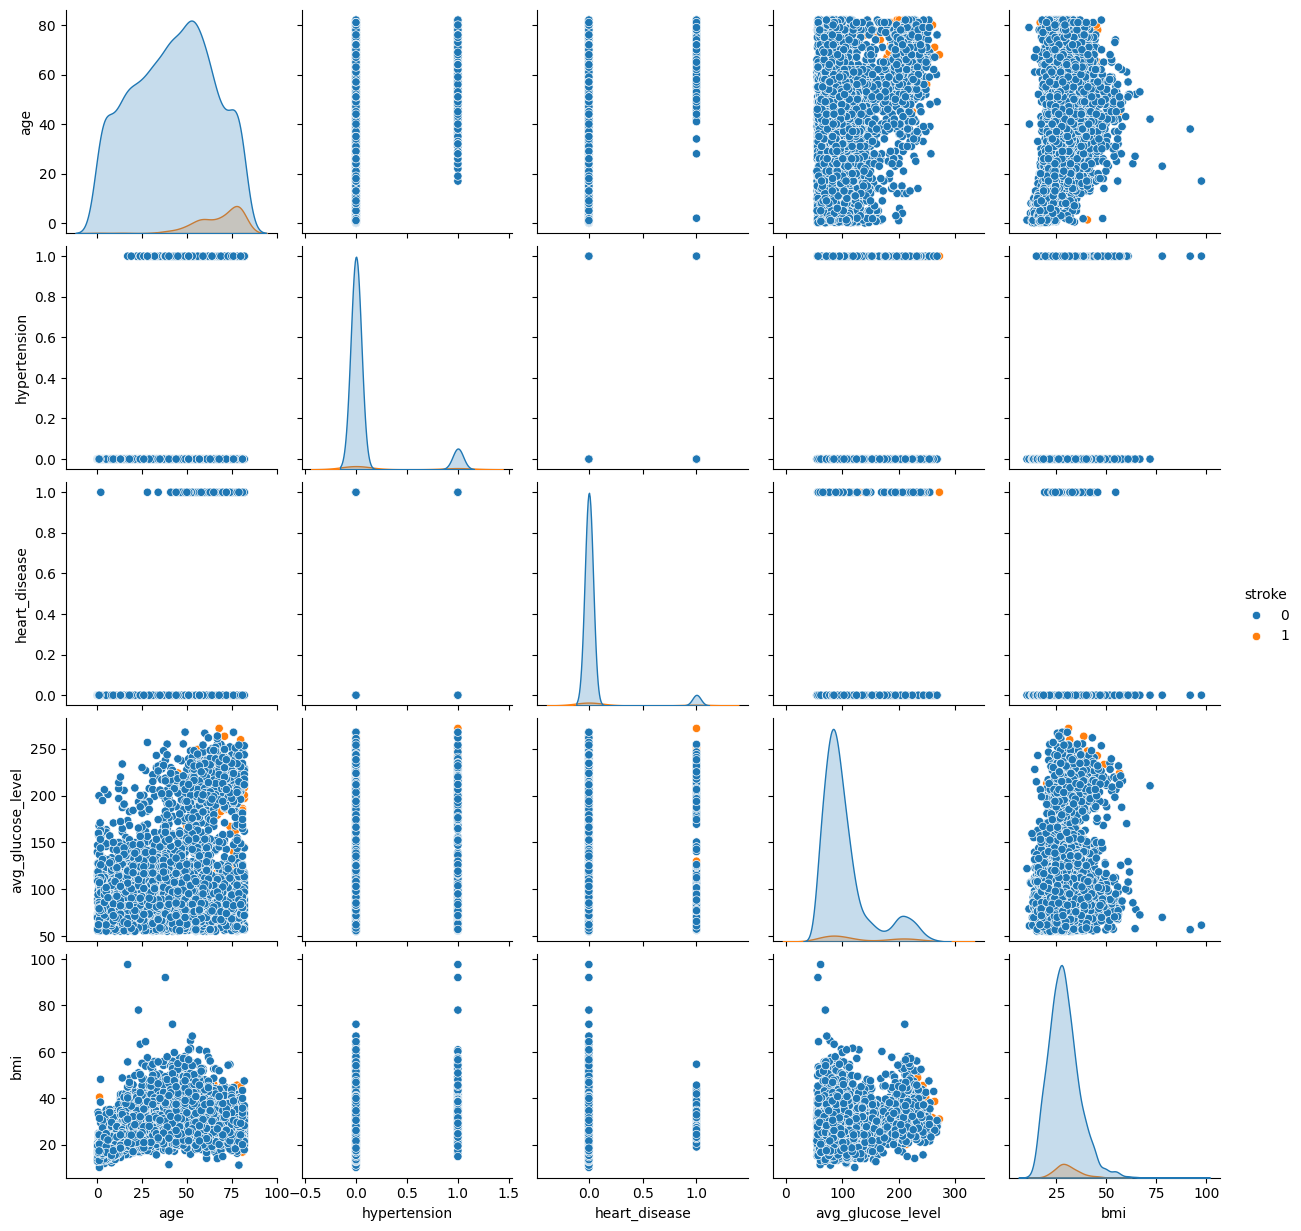

In [ ]:
sns.pairplot(df,hue='stroke')

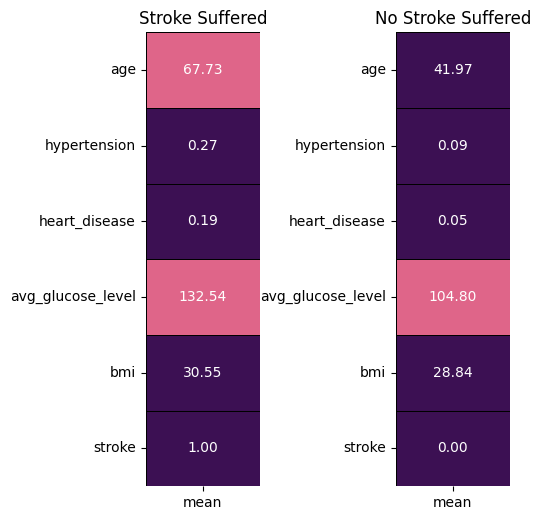

In [ ]:
stroke = df[df['stroke'] == 1].describe().T
no_stroke = df[df['stroke'] == 0].describe().T

colors = ['#3C1053','#DF6589']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke Suffered');

plt.subplot(1,2,2)
sns.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Stroke Suffered');

fig.tight_layout(pad = 0)

Inerpretation of above plot:
1. Mean age of the people who suffer from stroke is 67.73
2. Mean bmi of stroke suffered people is 30.55 higher than those who have not suffered from stroke.
3. There is increase in mean avg_glucose_level from those who have not suffered from stroke to stroke suffered people.
Thus parameters remain high mean for stroke suffered people.

Text(0.5, 1.0, 'stroke')

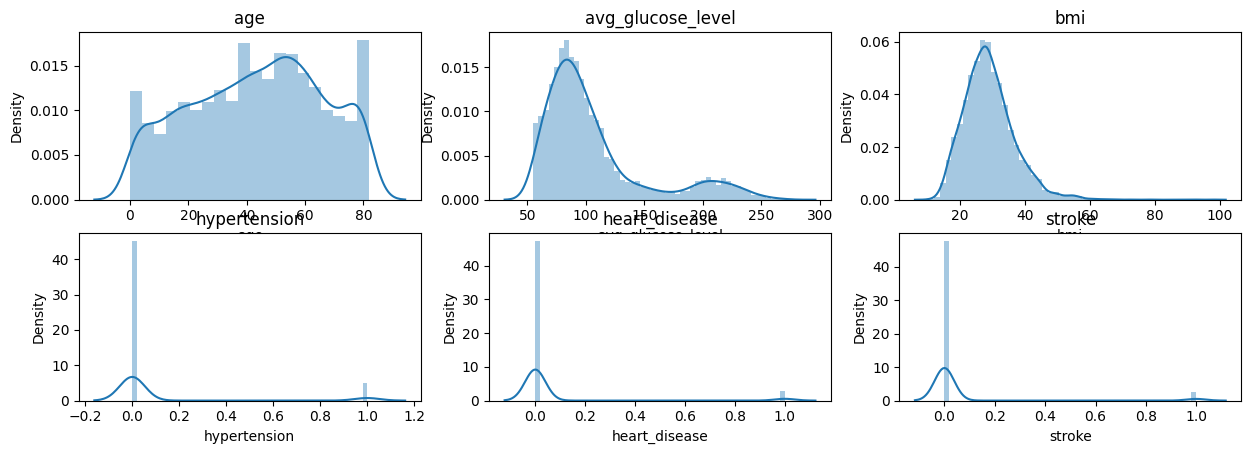

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(431)
sns.distplot(df['age'])
plt.title('age')
plt.subplot(432)
sns.distplot(df['avg_glucose_level'])
plt.title('avg_glucose_level')
plt.subplot(433)
sns.distplot(df['bmi'])
plt.title('bmi')
plt.subplot(434)
sns.distplot(df['hypertension'])
plt.title('hypertension')
plt.subplot(435)
sns.distplot(df['heart_disease'])
plt.title('heart_disease')
plt.subplot(436)
sns.distplot(df['stroke'])
plt.title('stroke')

1. Data distribution for age has dominant values around : 10, 60 & 80.
2. avg_glucose_level has 2 peaks of uneven heights present at values around : 100 & 200.
3. bmi has a near about normal distribution but it has values in low numbers towards the right side

# Feature Engineering

In [ ]:
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['work_type']=le.fit_transform(df['work_type'])
df['smoking_status']=le.fit_transform(df['smoking_status'])

In [ ]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
df['age'] = mms.fit_transform(df[['age']])
df['bmi'] = mms.fit_transform(df[['bmi']])
df['avg_glucose_level'] = mms.fit_transform(df[['avg_glucose_level']])


# Standardization
df['gender'] = ss.fit_transform(df[['gender']])
df['ever_married'] = ss.fit_transform(df[['ever_married']])
df['work_type'] = ss.fit_transform(df[['work_type']])
df['Residence_type'] = ss.fit_transform(df[['Residence_type']])
df['smoking_status'] = ss.fit_transform(df[['smoking_status']])

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<Axes: >

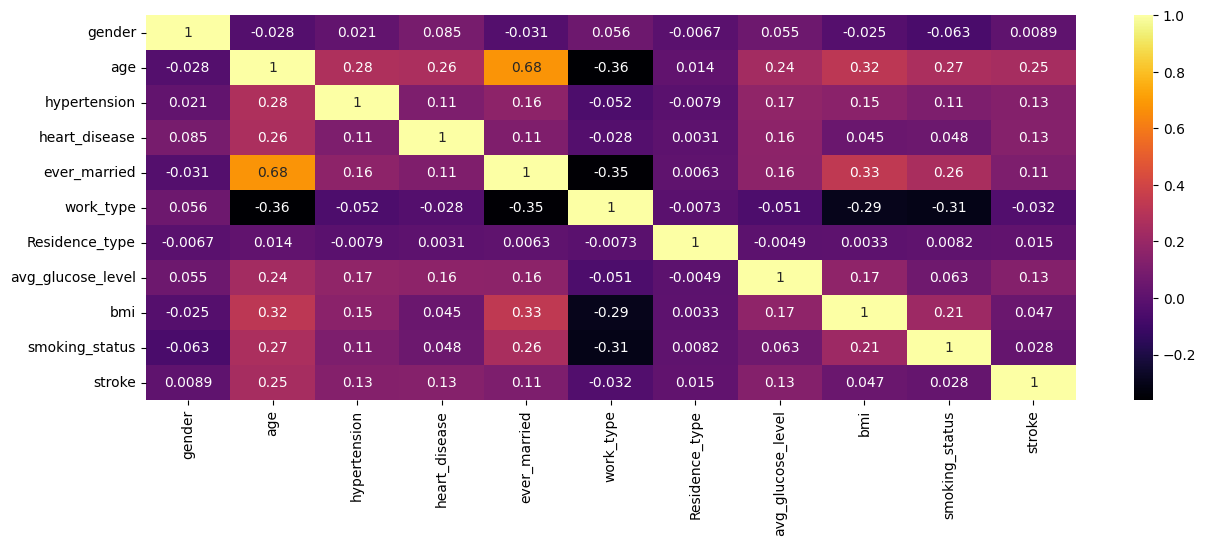

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='inferno')

1. Stroke has strong positive correlation with age among all attributes. This means that as age will increase, the chance of suffering from stroke will also increase.
2. Age and ever_married has positive correlation. As age will increase ever_married status will change.
3. Residence type shows very less correlation with other attributes.
4. We can see that there is perfect positive correlation of a variable with itself.

Checking for outliers

Text(0.5, 1.0, 'bmi')

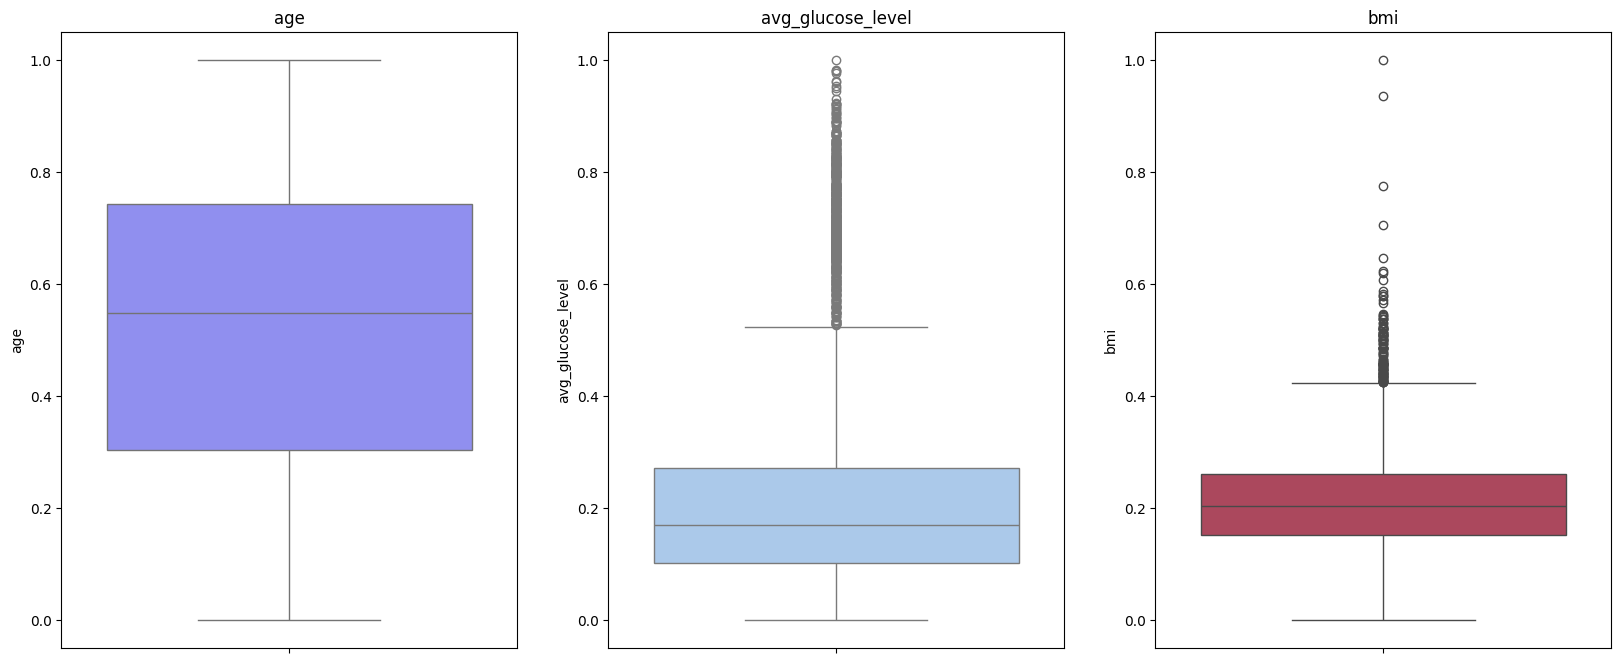

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(131)
sns.boxplot(df['age'],palette='cool')
plt.title('age')
plt.subplot(132)
sns.boxplot(df['avg_glucose_level'],palette='pastel')
plt.title('avg_glucose_level')
plt.subplot(133)
sns.boxplot(df['bmi'],palette='inferno')
plt.title('bmi')

Average glucose level and bmi has considerable amount of outliers. Thus we will remove them using winsorisation technique.

In [ ]:
percentile25 = df['bmi'].quantile(0.25)
percentile75 = df['bmi'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile75 - 1.5 * iqr

df['bmi_new'] = np.where(df['bmi'] >= upper_limit, upper_limit,
                         np.where(df['bmi'] <= lower_limit, lower_limit, df['bmi']))

<Axes: ylabel='bmi_new'>

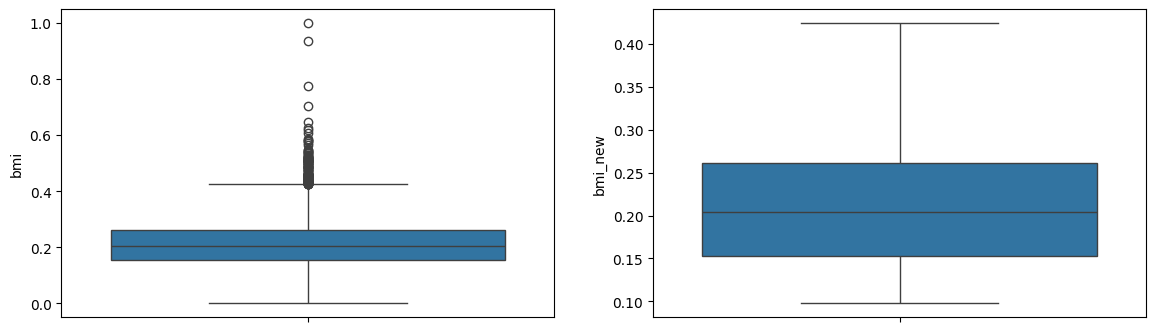

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(df['bmi'])
plt.subplot(122)
sns.boxplot(df['bmi_new'])

In [ ]:
percentile25 = df['avg_glucose_level'].quantile(0.25)
percentile75 = df['avg_glucose_level'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile75 - 1.5 * iqr

df['avg_glucose_level_new'] = np.where(df['avg_glucose_level'] >= upper_limit, upper_limit,
                         np.where(df['avg_glucose_level'] <= lower_limit, lower_limit, df['avg_glucose_level']))

Text(0.5, 1.0, 'avg_glucose_level without outliers')

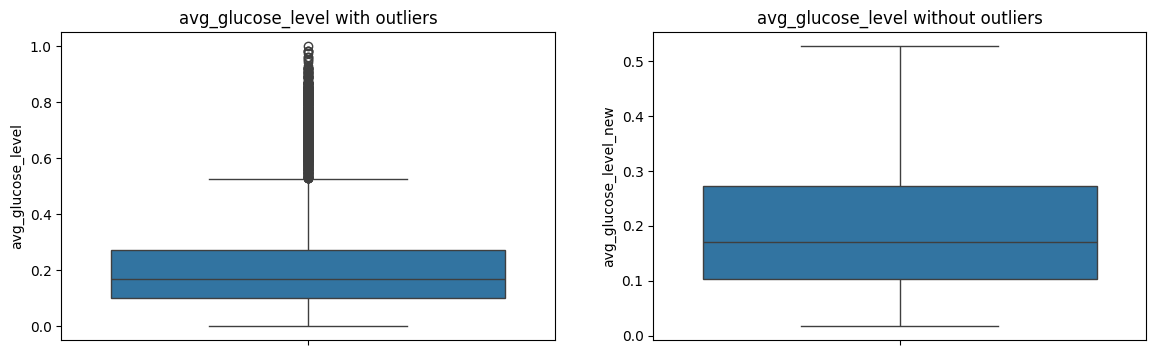

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(df['avg_glucose_level'])
plt.title('avg_glucose_level with outliers')
plt.subplot(122)
sns.boxplot(df['avg_glucose_level_new'])
plt.title('avg_glucose_level without outliers')

In [ ]:
df.drop(['bmi'],axis=1,inplace=True)

In [ ]:
df.drop(['avg_glucose_level'],axis=1,inplace=True)

In [ ]:
df.rename(columns={'bmi_new':'bmi','avg_glucose_level_new':'avg_glucose_level'},inplace=True)

The dataset is Unbalanced with a bias towards No Stroke in a ratio of 19 : 1 for No Stroke : Stroke. We will first balance the dataset using SMOTE Analysis!

In order to cope with unbalanced data, there are 2 options :

1. Undersampling : Trim down the majority samples of the target variable.
2. Oversampling : Increase the minority samples of the target variable to the majority samples.
For best performances, combination of undersampling and oversampling is recommended.

First, we will undersample the majority samples and it is followed by oversampling minority samples.
For data balancing, we will use imblearn.

In [ ]:
cols = df.columns.tolist()
cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke',
 'bmi',
 'avg_glucose_level']

In [ ]:
cols = cols[-2:] + cols[:-2]
cols

['bmi',
 'avg_glucose_level',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

In [ ]:
df = df[cols]

In [ ]:
over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df.loc[:,:'Residence_type']
t1 = df.loc[:,'stroke']

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 2490, 1: 2490})

Calculation for Data Balancing :¶

Sampling Strategy : It is a ratio which is the common paramter for oversampling and undersampling.

Sampling Strategy : ( Samples of Minority Class ) / ( Samples of Majority Class )

In this case,

Majority Class : No Stroke : 4861 samples

Minority Class : Stroke : 249 samples

Undersampling : Trim down the majority class samples
Sampling_Strategy = 0.1

0.1 = ( 249 ) / Majority Class Samples

After undersampling,

Majority Class : No Stroke : 2490 samples

Minority Class : Stroke : 249 samples

Oversampling : Increase the minority class samples
Sampling_Strategy = 1

1 = ( Minority Class Samples ) / 2490

After oversampling,

Majority Class : No Stroke : 2490 samples
Minority Class : Stroke : 2490 samples
Final Class Samples :

Majority Class : No Stroke : 2490 samples
Minority Class : Stroke : 2490 samples

Here, we balance the data by reducing the majority group samples & then increasing the minority group to majority group.
For imbalanced datasets, we duplicate the data to deal with the potential bias in the predictions.
Due to this duplication process, we are using synthetic data for modeling purposes to ensure that the predictions are not skewed towards the majority target class value.
Thus, evaluating models using accuracy will be misleading. Instead, we will go for confusion matrix, ROC-AUC graph and ROC-AUC score for model evaluation.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.15, random_state = 2,stratify=t1)

We will use stratified k fold validation as our dataset is highly imbalanced, small sized and need reliable evaluation.

In [ ]:
skf = StratifiedKFold(n_splits=4)
from sklearn.metrics import recall_score
from statistics import mean

for train_index, test_index in skf.split(f1,t1):

    x_train, x_test = [f1.iloc[i] for i in train_index], [f1.iloc[i] for i in test_index]
    y_train, y_test = [t1.iloc[i] for i in train_index], [t1.iloc[i] for i in test_index]
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       622
           1       0.76      0.82      0.79       623

    accuracy                           0.78      1245
   macro avg       0.78      0.78      0.78      1245
weighted avg       0.78      0.78      0.78      1245



Type-II error is important to discuss and thus we will consider recall metric.

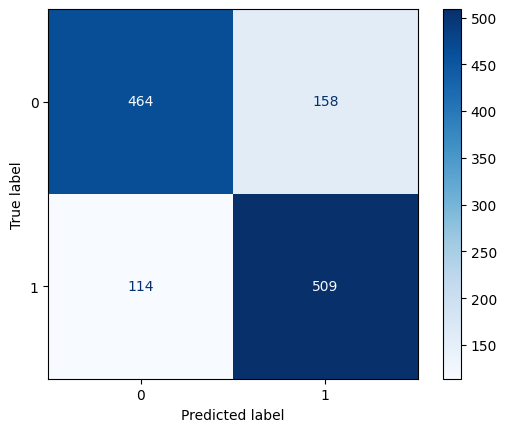

In [ ]:
cm = confusion_matrix(y_test, y_pred)
fp_lr=cm[0,1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

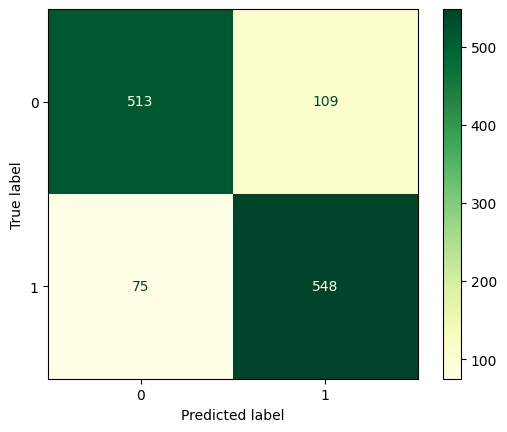

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       622
           1       0.83      0.88      0.86       623

    accuracy                           0.85      1245
   macro avg       0.85      0.85      0.85      1245
weighted avg       0.85      0.85      0.85      1245



In [ ]:
skf = StratifiedKFold(n_splits=4)
from sklearn.metrics import recall_score
from statistics import mean
recall = []

for train_index, test_index in skf.split(f1,t1):

    x_train, x_test = [f1.iloc[i] for i in train_index], [f1.iloc[i] for i in test_index]
    y_train, y_test = [t1.iloc[i] for i in train_index], [t1.iloc[i] for i in test_index]
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_pred_dt =dt.predict(x_test)

cm_dt=confusion_matrix(y_test, y_pred_dt)
fp_dt=cm_dt[0,1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot(cmap='YlGn')
plt.show()
print(classification_report(y_test, y_pred_dt))

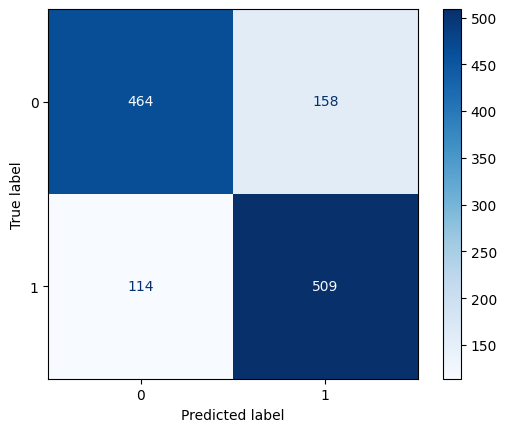

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       622
           1       0.87      0.94      0.90       623

    accuracy                           0.90      1245
   macro avg       0.90      0.90      0.90      1245
weighted avg       0.90      0.90      0.90      1245



In [ ]:
skf = StratifiedKFold(n_splits=4)
from sklearn.metrics import recall_score
from statistics import mean
recall = []

for train_index, test_index in skf.split(f1,t1):

    x_train, x_test = [f1.iloc[i] for i in train_index], [f1.iloc[i] for i in test_index]
    y_train, y_test = [t1.iloc[i] for i in train_index], [t1.iloc[i] for i in test_index]
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

cm_rf=confusion_matrix(y_test, y_pred)
fp_rf=cm_rf[0,1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test, y_pred_rf))

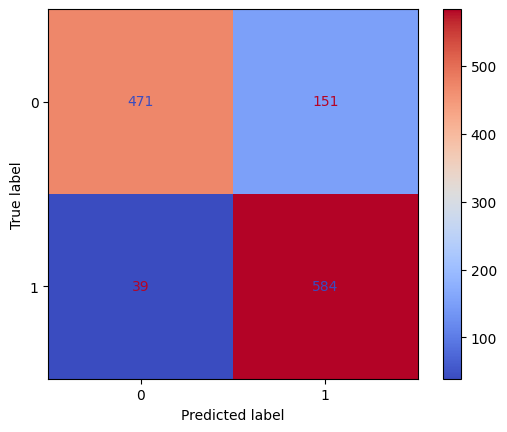

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       622
           1       0.79      0.94      0.86       623

    accuracy                           0.85      1245
   macro avg       0.86      0.85      0.85      1245
weighted avg       0.86      0.85      0.85      1245



In [ ]:
skf = StratifiedKFold(n_splits=4)
from sklearn.metrics import recall_score
from statistics import mean
recall = []

for train_index, test_index in skf.split(f1,t1):

    x_train, x_test = [f1.iloc[i] for i in train_index], [f1.iloc[i] for i in test_index]
    y_train, y_test = [t1.iloc[i] for i in train_index], [t1.iloc[i] for i in test_index]
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_pred_knn= knn.predict(x_test)

cm_knn=confusion_matrix(y_test, y_pred_knn)
fp_knn=cm_knn[0,1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(cmap='coolwarm')
plt.show()
print(classification_report(y_test, y_pred_knn))

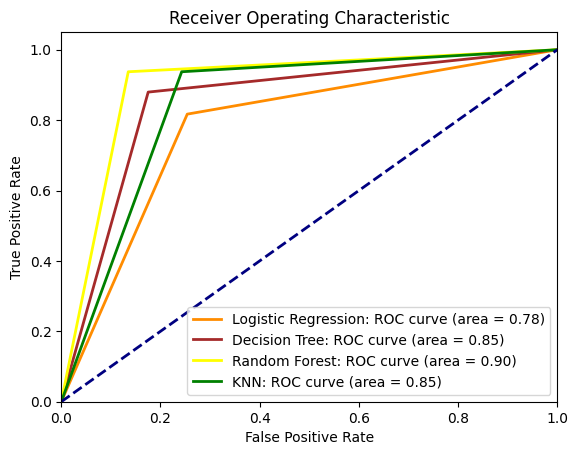

In [ ]:
fpr1, tpr1, t = roc_curve(y_test, y_pred)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, t = roc_curve(y_test, y_pred_dt)
roc_auc2= auc(fpr2, tpr2)
fpr3, tpr3, t = roc_curve(y_test, y_pred_rf)
roc_auc3= auc(fpr3, tpr3)
fpr4, tpr4, t = roc_curve(y_test, y_pred_knn)
roc_auc4= auc(fpr4, tpr4)


plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='Logistic Regression: ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='brown', lw=2, label='Decision Tree: ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='yellow', lw=2, label='Random Forest: ROC curve (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='green', lw=2, label='KNN: ROC curve (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The AUC is a single scalar value that summarizes the performance of a classifier. It is the area under the ROC curve.

Interpretation of AUC
1. AUC = 1: Indicates a perfect classifier. The model perfectly distinguishes between positive and negative classes.
2. AUC = 0.5: Indicates a classifier that performs no better than random guessing.
3. 0.5 < AUC < 1: Indicates the degree to which the classifier is better than random. The higher the AUC, the better the model's performance.
4. AUC < 0.5: Indicates that the classifier is worse than random guessing, which might suggest an issue with the model or data.

This means our model is performing better than random.

In [ ]:
from sklearn.metrics import recall_score
final_result=pd.DataFrame(columns=['Model','Recall','false positives','Area under curve'])
final_result=pd.concat([final_result,pd.DataFrame({
    'Model':['Logistic Regression','Decision Tree','Random Forest','KNN'],
    'Recall':[recall_score(y_test,y_pred), recall_score(y_test,y_pred_dt), recall_score(y_test,y_pred_rf), recall_score(y_test,y_pred_knn)],
    'false positives':[fp_lr, fp_dt, fp_rf, fp_knn],
    'Area under curve':[roc_auc1, roc_auc2, roc_auc3, roc_auc4]
})])
final_result

,Model,Recall,false positives,Area under curve
0,Logistic Regression,0.817014,158,0.781498
1,Decision Tree,0.879615,109,0.852187
2,Random Forest,0.937400,158,0.901176
3,KNN,0.937400,151,0.847317


We can see that we have high recall for knn model i.e. 0.937 but we can see the false positives are high and area under curve is less in comparison of the decision tree.

We know that we can not compromise with false positives. Thus we will use Decision Tree having 0.879 recall, 109 false positives and 0.85 area under curve.

Thus, on this dataset, Decision Tree will perform better. Further we can apply bagging and boosting techniques along with tuning of suitable hyperparameters.